In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("data.csv",',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [4]:
data.head()

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [5]:
data[data['password'].isnull()]

password  strength
367579      NaN         0

In [6]:
data.dropna(inplace=True)

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
y = data['strength']

In [10]:
y.head()

0    1
1    0
2    0
3    1
4    2
Name: strength, dtype: int64

In [11]:
X = data['password']

In [12]:
X.head()

0            e45ump5y
1             freeze9
2             vicky72
3           cekoky287
4    BsGL8ETQ0OQCl1dh
Name: password, dtype: object

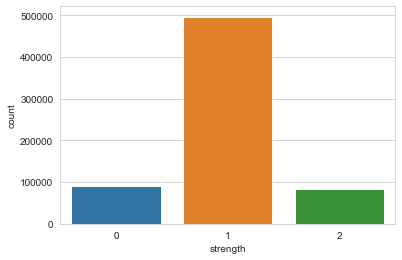

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

In [14]:
def words_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

In [16]:
X.shape

(669639, 153)

In [17]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
vectorizer.vocabulary_

{'e': 60,
 '4': 38,
 '5': 39,
 'u': 76,
 'm': 68,
 'p': 71,
 'y': 80,
 'f': 61,
 'r': 73,
 'z': 81,
 '9': 43,
 'v': 77,
 'i': 64,
 'c': 58,
 'k': 66,
 '7': 41,
 '2': 36,
 'o': 70,
 '8': 42,
 'b': 57,
 's': 74,
 'g': 62,
 'l': 67,
 't': 75,
 'q': 72,
 '0': 34,
 '1': 35,
 'd': 59,
 'h': 63,
 'a': 56,
 'j': 65,
 'n': 69,
 'w': 78,
 '3': 37,
 '6': 40,
 'x': 79,
 '!': 21,
 '@': 49,
 '#': 23,
 '$': 24,
 '%': 25,
 '^': 53,
 '*': 29,
 '_': 54,
 '.': 32,
 '-': 31,
 '&': 26,
 ' ': 20,
 ';': 44,
 '+': 30,
 '/': 33,
 '\\': 51,
 '?': 48,
 'ä': 119,
 '™': 152,
 ')': 28,
 '=': 46,
 '[': 50,
 ']': 52,
 '>': 47,
 '(': 27,
 '{': 82,
 '±': 99,
 '<': 45,
 '~': 85,
 '\x16': 12,
 'ó': 132,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 'þ': 142,
 '\x04': 2,
 '\x0e': 6,
 '|': 83,
 '«': 96,
 'ð': 129,
 'ñ': 130,
 'æ': 121,
 '°': 98,
 '`': 55,
 '\x8d': 88,
 '³': 101,
 '—': 146,
 'á': 116,
 '»': 108,
 '\x81': 87,
 'ï': 128,
 '÷': 136,
 '¨': 95,
 'µ': 103,
 'ç': 122,
 '›': 151,
 'ü': 140,
 'â': 117,
 '}': 84,
 'õ': 134,
 '

In [19]:
data.iloc[0][0]

'e45ump5y'

In [20]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

tfidf
5   0.644062
p   0.353865
y   0.332543
4   0.318745
u   0.309271
..       ...
\   0.000000
]   0.000000
^   0.000000
_   0.000000
™   0.000000

[153 rows x 1 columns]

In [21]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting

In [24]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(log_class.score(X_test,y_test))

0.8124589331581148


In [26]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8206200346454812


In [27]:
X_predict=np.array(["2DFSabc#d$$$$"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


In [28]:
import pickle
Model=pickle.dumps(clf)

In [29]:
import tkinter as tk
from tkinter import ttk
win = tk.Tk()
win.title('Gimme Some Text')

''

In [30]:
Pwd=ttk.Label(win,text="Enter your text here")
Pwd.grid(row=0,column=0,sticky=tk.W)
Pwd_var=tk.StringVar()
Pwd_entrybox=ttk.Entry(win,width=16,textvariable=Pwd_var)
Pwd_entrybox.grid(row=0,column=1)

In [31]:
def action():
    global DB
    import pandas as pd
    DF = pd.DataFrame(columns=['password'])
    pwd=Pwd_var.get()
    DF.loc[0,'password']=pwd
    print(DF.shape)
    DB=DF
    Output()

In [32]:
def Output():
    X_predict=DB['password']
    X_predict=vectorizer.transform(X_predict)
    output=clf.predict(X_predict)
    if output==1:
        result='Strong'
    elif output==0:
        result='Weak'
    Predict_entrybox=ttk.Entry(win,width=16)
    Predict_entrybox.grid(row=20,column=1)
    Predict_entrybox.insert(1,str(result))
Predict_button=ttk.Button(win,text="OK",command=action)
Predict_button.grid(row=30,column=0)
Predict_button=ttk.Button(win,text="Cancel",command=win.destroy)
Predict_button.grid(row=30,column=1)
win.mainloop()

(1, 1)
